<a class="anchor" id="0"></a>
# **W06 - Random Forest and Gradient Boosting Decision Tree**

*   **Angela Melia Gunawan / 0706022310023**
*   **Jessica Laurentia Tedja / 0706022310008**

In [ ]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

# **Data Preprocessing and EDA**

## **Load the Dataset**

In [ ]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')

## **Inspect the Dataset**

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


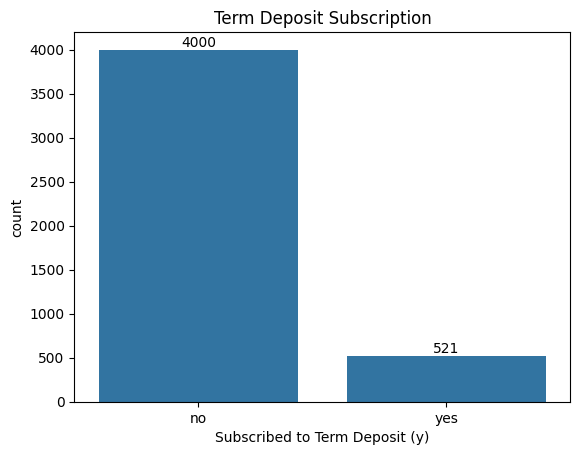

In [ ]:
# show how many attrition
ax = sns.countplot(data=df, x='y')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.title('Term Deposit Subscription')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

## **Handle Missing or Inconsistent Values**

In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## **Visualizations**

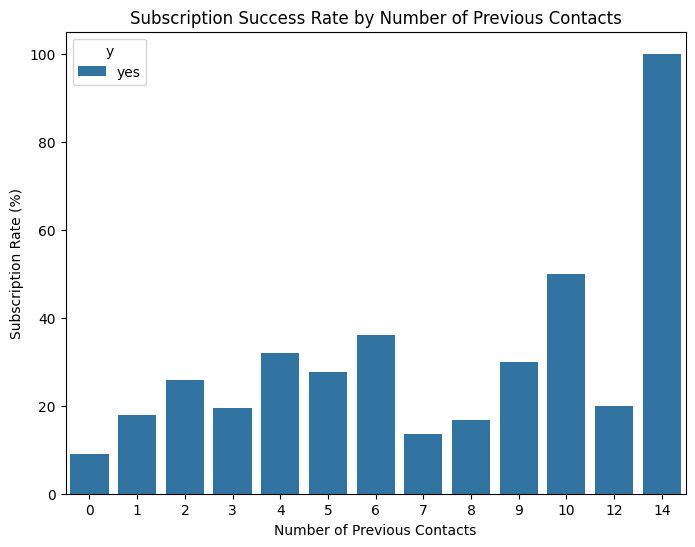

In [ ]:
prev_success = df.groupby('previous')['y'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=prev_success[prev_success['y']=='yes'], x='previous', y='percentage', hue='y')
plt.title('Subscription Success Rate by Number of Previous Contacts')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Subscription Rate (%)')
plt.show()

**Key Findings:**

*   The likelihood of subscription generally increases as the number of previous contacts rises, showing that repeated follow-ups improve conversion chances.
*   Customers who were contacted 0-1 times have the lowest subscription rates (below 20%), indicating that first-time outreach is less effective.
*   After about 4 or more contacts, the subscription rate starts to climb noticeably, suggesting persistence pays off in engagement efforts.
*   Moderate to high contact frequency (4–10 follow-ups) appears most effective, but excessive contact (e.g., 14) should be interpreted cautiously and balanced with potential customer fatigue.

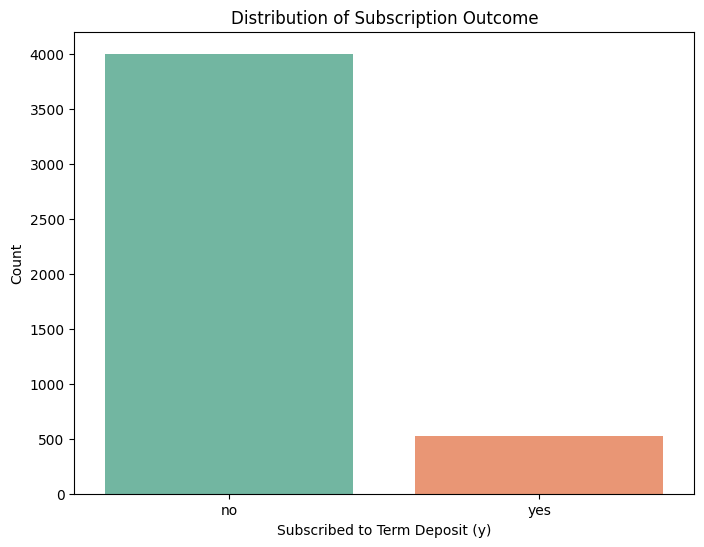

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='y', palette='Set2', hue='y')
plt.title('Distribution of Subscription Outcome')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Count')
plt.show()

**Key Findings:**
*   The majority of clients in the dataset did not subscribe to the term deposit after being contacted by the bank.
*   This indicates that the marketing campaign had a relatively low success rate, suggesting limited effectiveness in convincing clients to open a term deposit.
* The large gap between the number of "no" and "yes" responses shows that most clients were not interested or not persuaded by the campaign message.
This imbalance could imply that the target audience or communication approach was not well-aligned with client preferences.
* The results highlight a need for the bank to analyze customer segments more deeply — for example, by examining factors such as job type, education level, or contact method — to understand what influences a client’s decision.
* It also suggests that improving engagement strategies, such as personalizing offers, building stronger relationships, or timing contact better, could help increase future subscription rates.
* Overall, the finding emphasizes that while many clients were reached, few were successfully converted, signaling an opportunity for campaign refinement and strategic improvement.

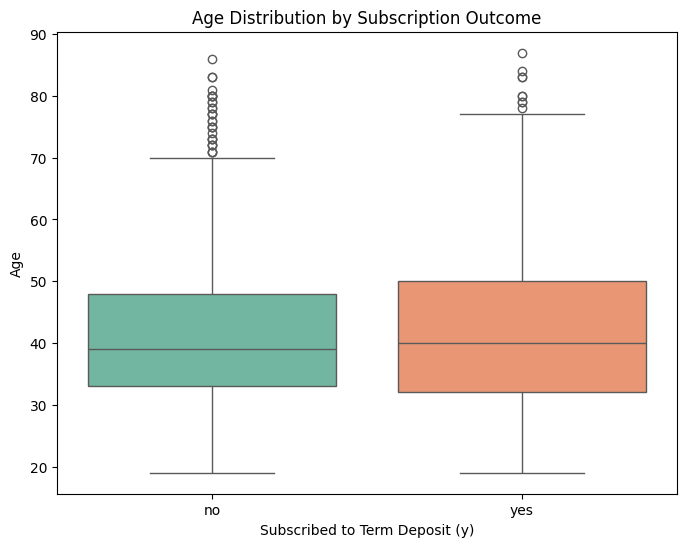

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='y', y='age', palette='Set2', hue='y')
plt.title('Age Distribution by Subscription Outcome')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Age')
plt.show()

**Key Findings:**

*   Customers who subscribed "yes" tend to be slightly older on average than those who did not.
*   There are more outliers among non-subscribers, especially in the older age range (above 70), indicating a few very old customers who didn't subscribe.
*   The lower range of ages (under 30) appears more common among non-subscribers, implying reduced interest from younger individuals.
*   The overall age range (from about 19 to 90) is comparable between the two groups, but the distribution for “yes” is slightly more centered around middle age.


## **Encode the Features**

In [ ]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'age':
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
--------------------
Unique values for column 'job':
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
--------------------
Unique values for column 'marital':
['married' 'single' 'divorced']
--------------------
Unique values for column 'education':
['primary' 'secondary' 'tertiary' 'unknown']
--------------------
Unique values for column 'default':
['no' 'yes']
--------------------
Unique values for column 'balance':
[ 1787  4789  1350 ...  -333 -3313  1137]
--------------------
Unique values for column 'housing':
['no' 'yes']
--------------------
Unique values for column 'loan':
['no' 'yes']
--------------------
Unique values for column 'contact':
['ce

In [ ]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: default, housing, loan, y

one_hot_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2441,36,0.0,1.0,1.0,0,957,1,0,2.0,21,8.0,206,1,-1,0,3.0,0
2184,32,4.0,1.0,2.0,0,3107,1,1,0.0,25,5.0,310,1,-1,0,3.0,0
499,42,4.0,2.0,2.0,0,515,1,0,0.0,19,9.0,501,2,-1,0,3.0,0
2306,36,9.0,1.0,2.0,0,6,1,0,0.0,27,4.0,100,1,435,1,0.0,0
1816,52,7.0,1.0,1.0,0,381,0,1,0.0,25,1.0,288,12,-1,0,3.0,0


In [ ]:
# checking encode result
df.loc[3050]

,3050
age,31
job,technician
marital,single
education,unknown
default,no
balance,187
housing,no
loan,no
contact,cellular
day,17


## **Separate Features and Target**

In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0.0,0,1787,0,0,0.0,19,10.0,79,1,-1,0,3.0
1,33,7.0,1.0,1.0,0,4789,1,1,0.0,11,8.0,220,1,339,4,0.0
2,35,4.0,2.0,2.0,0,1350,1,0,0.0,16,0.0,185,1,330,1,0.0
3,30,4.0,1.0,2.0,0,1476,1,1,2.0,3,6.0,199,4,-1,0,3.0
4,59,1.0,1.0,1.0,0,0,1,0,2.0,5,8.0,226,1,-1,0,3.0


In [ ]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


## **Train and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4153,42,9.0,1.0,1.0,0,440,1,0,0.0,3,3.0,13,5,-1,0,3.0
2085,33,1.0,1.0,1.0,0,-77,1,0,0.0,28,5.0,151,3,-1,0,3.0
1891,32,4.0,2.0,2.0,0,656,1,1,0.0,20,0.0,148,2,-1,0,3.0
3611,28,9.0,2.0,1.0,0,389,1,0,0.0,11,8.0,15,7,-1,0,3.0
4015,36,9.0,1.0,1.0,0,5902,1,0,2.0,23,8.0,219,4,-1,0,3.0


In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2398,51,2.0,1.0,1.0,1,-2082,0,1,0.0,28,5.0,123,6,-1,0,3.0
800,50,4.0,1.0,2.0,0,2881,0,0,0.0,5,1.0,510,2,2,5,1.0
2288,50,9.0,1.0,1.0,0,1412,0,0,0.0,6,1.0,131,3,-1,0,3.0
2344,37,4.0,1.0,2.0,0,0,1,0,2.0,3,6.0,247,13,-1,0,3.0
3615,31,0.0,2.0,1.0,0,757,0,0,0.0,3,3.0,343,2,-1,0,3.0


# **Model Development**

## **Oversampling using SMOTE-NC**

In [ ]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

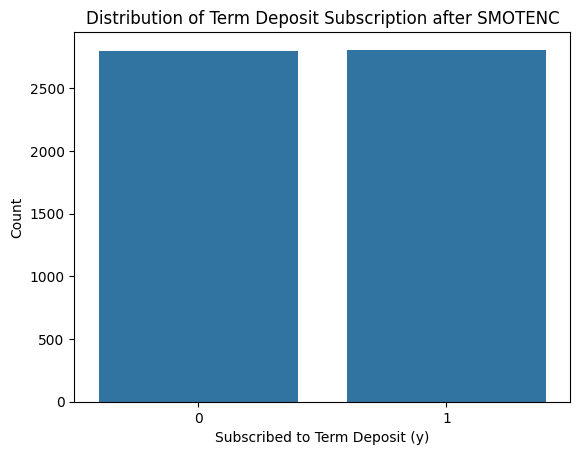

In [ ]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Term Deposit Subscription after SMOTENC')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Count')
plt.show()

## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1206
           1       0.88      0.89      0.88      1194

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



### **K-Fold Cross Validation**

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [ ]:
score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.88630807 0.89444097 0.88588957 0.87523277 0.88723668]
Average score: 0.89


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 42}
Best cross-validation f1 score: 0.867


### **Feature Importance**

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[4.47326739e-02 3.52637163e-02 2.00719451e-02 1.74650981e-02
 1.69467785e-04 9.63182835e-02 2.15165413e-02 3.58731393e-02
 7.49201195e-02 4.27791127e-02 6.10098404e-02 3.60706923e-01
 1.90951330e-02 8.03013148e-02 1.00033700e-02 7.97733215e-02]


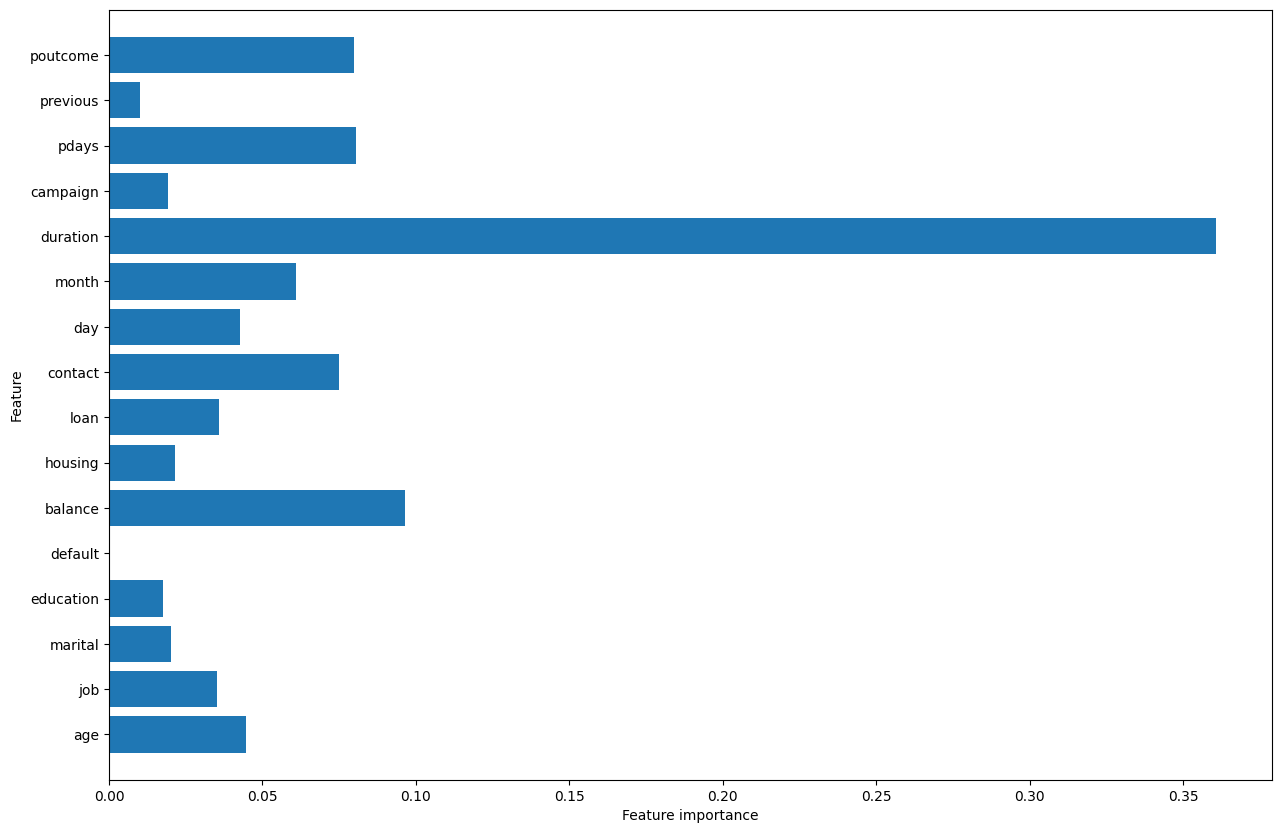

In [ ]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [ ]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.360707
balance,0.096318
pdays,0.080301
poutcome,0.079773
contact,0.074920
month,0.061010


In [ ]:
# using only important features for the prediction
important_features = ['duration', 'balance', 'pdays', 'poutcome', 'contact', 'month']
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [ ]:
display(X_importance)
display(y_importance)

,duration,balance,pdays,poutcome,contact,month
0,79,1787,-1,3.0,0.0,10.0
1,220,4789,339,0.0,0.0,8.0
2,185,1350,330,0.0,0.0,0.0
3,199,1476,-1,3.0,2.0,6.0
4,226,0,-1,3.0,2.0,8.0
...,...,...,...,...,...,...
4516,329,-333,-1,3.0,0.0,5.0
4517,153,-3313,-1,3.0,2.0,8.0
4518,151,295,-1,3.0,0.0,1.0
4519,129,1137,211,1.0,0.0,3.0


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [ ]:
# oversampling again
categorical_features = ["contact", "poutcome", "month"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

# check the shape of X_train and X_test
X_train_importance.shape, X_test_importance.shape

((5600, 6), (2400, 6))

In [ ]:
importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1206
           1       0.86      0.87      0.86      1194

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



## **Random Forest Classifier**

### **No Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_features="sqrt",
    max_depth=6,
    max_leaf_nodes=6
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=6)

In [ ]:
# Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print results
print("=== Random Forest Classifier Results ===")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

=== Random Forest Classifier Results ===

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2794
           1       0.83      0.86      0.85      2806

    accuracy                           0.84      5600
   macro avg       0.84      0.84      0.84      5600
weighted avg       0.84      0.84      0.84      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1206
           1       0.83      0.86      0.84      1194

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400



### **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid=param_grid,
    cv=5
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(bootstrap=False, n_estimators=200)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=200)

In [ ]:
# Predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print results
print("=== Random Forest Classifier Results ===")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

=== Random Forest Classifier Results ===

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1206
           1       0.91      0.93      0.92      1194

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



## **Gradient Boosting Classifier (XGBoost)**

### **No Tuning**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
gbc_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    max_features=3
)

# Train the model
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, random_state=42)

In [ ]:
# Make predictions
y_pred_train = gbc_clf.predict(X_train)
y_pred_test = gbc_clf.predict(X_test)

# Print results
print("=== Gradient Boosting Classifier Results ===")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

=== Gradient Boosting Classifier Results ===

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2794
           1       0.88      0.90      0.89      2806

    accuracy                           0.89      5600
   macro avg       0.89      0.89      0.89      5600
weighted avg       0.89      0.89      0.89      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1206
           1       0.88      0.89      0.88      1194

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



### **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy_best)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best Model Accuracy: 0.9316666666666666


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
gbc_clf = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.2,
    random_state=42,
    max_depth=7
)

# Train the model
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200,
                           random_state=42)

In [ ]:
# Make predictions
y_pred_train = gbc_clf.predict(X_train)
y_pred_test = gbc_clf.predict(X_test)

# Print results
print("=== Gradient Boosting Classifier Results ===")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

=== Gradient Boosting Classifier Results ===

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1206
           1       0.92      0.94      0.93      1194

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



# **Model Evaluation**


=== Decision Tree - Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Decision Tree - Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1206
           1       0.88      0.88      0.88      1194

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



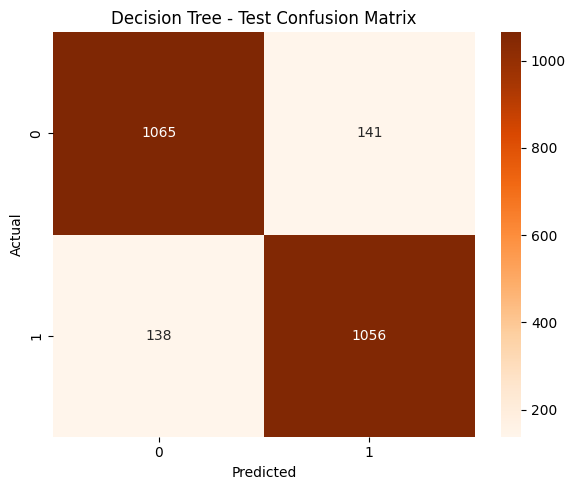


=== Random Forest - Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Random Forest - Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1206
           1       0.91      0.93      0.92      1194

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



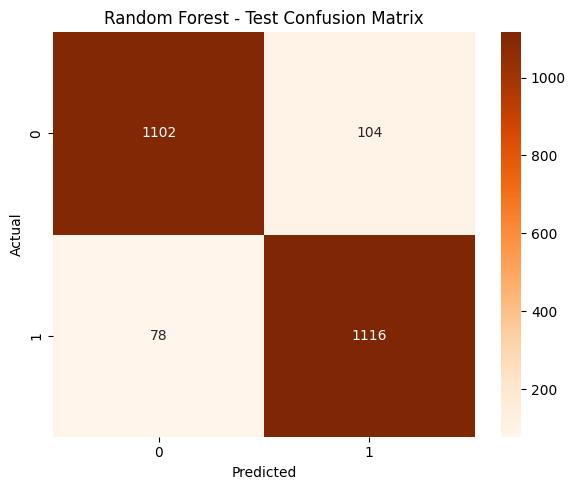


=== XGBoost - Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== XGBoost - Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1206
           1       0.92      0.94      0.93      1194

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



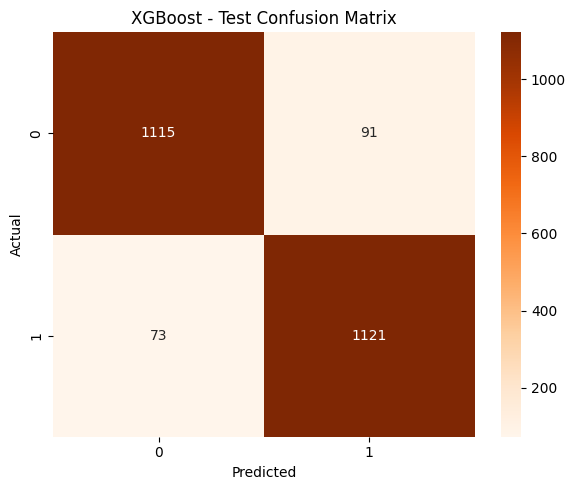

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# === Helper function to evaluate and visualize ===
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    results = {
        'Model': name,
        'Accuracy (Train)': accuracy_score(y_train, y_pred_train),
        'Accuracy (Test)': accuracy_score(y_test, y_pred_test),
        'Precision (Test)': precision_score(y_test, y_pred_test, average='weighted'),
        'Recall (Test)': recall_score(y_test, y_pred_test, average='weighted'),
        'F1-score (Test)': f1_score(y_test, y_pred_test, average='weighted')
    }

    # Print classification reports
    print(f"\n=== {name} - Classification Report (Training Set) ===")
    print(classification_report(y_train, y_pred_train))

    print(f"\n=== {name} - Classification Report (Test Set) ===")
    print(classification_report(y_test, y_pred_test))

    # Confusion Matrices
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Oranges')
    plt.title(f'{name} - Test Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    return results

# === Evaluate all models ===
results = []

# Decision Tree (no parameter)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
results.append(evaluate_model("Decision Tree", tree, X_train, y_train, X_test, y_test))

# Random Forest (after hyperparameter tuning)
results.append(evaluate_model("Random Forest", model, X_train, y_train, X_test, y_test))

# XGBoost / Gradient Boosting Classifier (after hyperparameter tuning)
results.append(evaluate_model("XGBoost", gbc_clf, X_train, y_train, X_test, y_test))

In [ ]:
# === Comparison Table ===
results_df = pd.DataFrame(results)
print("\n=== Model Performance Comparison ===")
results_df.round(4)


=== Model Performance Comparison ===


,Model,Accuracy (Train),Accuracy (Test),Precision (Test),Recall (Test),F1-score (Test)
0,Decision Tree,1.0,0.8838,0.8838,0.8838,0.8838
1,Random Forest,1.0,0.9242,0.9244,0.9242,0.9242
2,XGBoost,1.0,0.9317,0.9318,0.9317,0.9317


# **Discussion & Insights**

### **Which model performed best overall?**
The **XGBoost** model **(after hyperparameter tuning)** achieved the best overall performance among all models. It obtained the highest accuracy (0.9317), precision (0.9318), recall (0.9317), and F1-score (0.9317) on the test data. This shows that the tuned XGBoost model was able to generalize better and produce more consistent predictions compared to both the Decision Tree and Random Forest.

### **Did ensemble methods (RF, XGBoost) improve performance compared to a single Decision Tree?**
**Yes**, the ensemble methods **(Random Forest and XGBoost)** clearly improved performance compared to the **single Decision Tree model.** The Decision Tree achieved a test accuracy of 0.8838, while both Random Forest (0.9242) and XGBoost (0.9317) performed significantly better across all metrics.

This improvement occurs because ensemble models combine the results of multiple decision trees, making predictions more stable and reducing overfitting. The Decision Tree, trained with default parameters, overfit the training data (accuracy = 1.0) and did not generalize well to new data. In contrast, Random Forest averages predictions from many trees, and XGBoost further enhances accuracy by iteratively correcting errors made by previous trees.

As a result, both ensemble methods produced higher accuracy, precision, recall, and F1-scores, demonstrating stronger generalization and reliability compared to the single Decision Tree.

### **How could the bank use these insights to refine its marketing strategy?**
The bank can use the insights from the best-performing XGBoost model to make its marketing strategy more data-driven and effective. Since the model can accurately predict customer behavior, the bank can identify **which customers are most likely to respond positively to campaigns or financial offers.** This allows the marketing team to focus their efforts and budget on **high-potential customers rather than targeting everyone equally.**

By using model predictions, the bank can also personalize marketing messages, for example offering tailored loan, credit card, or investment products that match each customer’s profile. In addition, it also can help identify customers at **risk of churn**, allowing the bank to **take proactive steps** such as **offering loyalty rewards or personalized assistance**.

Overall, these model-driven insights help the bank **improve campaign efficiency**, **increase customer satisfaction**, and **strengthen**.